In [1]:
import numpy as np
import pandas as pd
#from scipy import interpolate
#from scipy.constants import elementary_charge as E_CHARGE
#from scipy.constants import Boltzmann as BOLTZMANN
#from scipy.constants import c as LIGHT_SPEED
#from scipy.integrate import trapz, quad
#from scipy.interpolate import interp1d
#import matplotlib as mpl
from matplotlib import pyplot as plt
#from matplotlib.ticker import AutoMinorLocator, MaxNLocator, FormatStrFormatter, MultipleLocator
from matplotlib.ticker import AutoMinorLocator, LogLocator
from cycler import cycler
import yaml

In [2]:
#%% Plotting parameters

DPI_SAVE = 600
DPI_PLOT = 150
cm = 1/2.54 #to size the figure in cm

In [3]:
# load styles

plt.style.use('./pv-textbook_inigo.mplstyle')

In [4]:
# load colors

with open('./colors.yaml') as f:
    content = f.read()
    print (content)

colors = {}
yaml_file = open("./colors.yaml", 'r')
yaml_content = yaml.safe_load(yaml_file)
for key, value in yaml_content.items():
    colors[key] = value

colorlist = [colors[key] for key in colors]
plt.rcParams['axes.prop_cycle'] = cycler(color=colorlist)

# Default colors for the book "Fundamentals of Solar Cells 
# and Photovoltaic Systems Engineering"

color1 : '#5FA1D8' #ligthblue
color2 : '#B31F20' #darkred
color3 : '#498F34' #green
color4 : '#EBD741' #darkyellow
color5 : '#F18B45' #orange
color6 : '#002060' #darkblue
color7 : '#55B99D' #turqoise
color8 : '#BDC554' #yellowgreen
color9 : '#4472C4' #blue
color10 : '#B9DEF3' #verylightblue
color11 : 'black'  #black
color12 : '#BDBDBD' #lightgray
color13 : '#696969' #gray
color14 : '#CD853F' #brown
color15 : '#FF7F50' #lightpink


#### Import efficiency data

In [5]:
jvs={}
p={}
i_max={}
v_max={}
for gap in ['0.8', '1.3', '1.8']:
    path='./data/jv_sgsc_AM15G_'+gap+'eV.txt'
    jvs[gap]=pd.read_csv(path, delimiter=',', header=None, dtype='float').set_index(0)
    p[gap]=pd.DataFrame(index=jvs[gap].index, data=(np.array(jvs[gap].index).T*np.array(jvs[gap].values).T).T)
    v_max[gap]=p[gap].idxmax()[0]
    i_max[gap]=jvs[gap].loc[v_max[gap]][1]

#### Plot

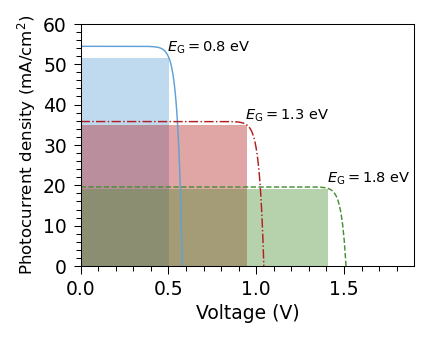

In [12]:
fig = plt.figure(figsize=(6.8*cm, 5.2*cm), dpi=DPI_PLOT)
ax = fig.add_subplot(111)

for [gap,style] in zip(jvs,['-', '-.', '--']):
    ax.plot(jvs[gap], ls=style)
    ax.fill_between([0,v_max[gap]], i_max[gap], alpha=0.4)
    
for [i, gap] in enumerate (jvs):
    text=r'$E_{\mathrm{G}}=$'+gap+' eV'
    xy=[v_max[gap], i_max[gap]]
    xy_text=[v_max[gap]-0.01, i_max[gap]+1.5]
    ax.annotate(text, xy, xy_text, size=7)

ax.set_xlabel("Voltage (V)")
ax.set_xlim([0., 1.9])
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.xaxis.set_tick_params(direction='out', which='both')

ax.set_ylabel(r"Photocurrent density (mA/cm$^2$)", size=8)
ax.set_ylim([0, 60])
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_tick_params(direction='out', which='both')

plt.tight_layout(pad=0.01)

#plt.savefig ('./SQ_jv.png', dpi=DPI_SAVE)